In [ ]:
import pandas as pd
from google.colab import files
uploaded1 = files.upload()

Saving data.csv to data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded1['data.csv']))

In [ ]:
positive_text=data.loc[data['label'] == 'Positive']

In [ ]:
negative_text=data.loc[data['label'] == 'negative']

In [ ]:
len(negative_text)

0

In [ ]:
neutre_text=data.loc[data['label'] == 'neutre']

Text(0.5, 1.0, 'classe des tweets')

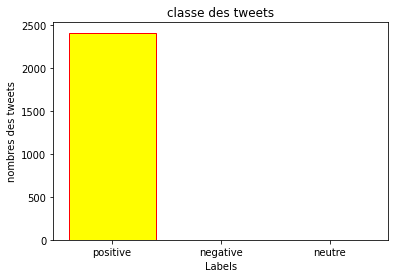

In [ ]:
import matplotlib.pyplot as pyplot

x = ['positive','negative','neutre']
y = [len(positive_text), len(negative_text), len(neutre_text)]
pyplot.bar(x, y,  color='yellow', edgecolor = 'red')

pyplot.xlabel('Labels')
pyplot.ylabel('nombres des tweets')
pyplot.title('classe des tweets')

In [ ]:
positive_text2

,label
1,Positive
2,Positive
3,Positive
5,Positive
6,Positive
...,...
3195,Positive
3196,Positive
3197,Positive
3198,Positive


In [ ]:
data

,date,text,label,tokens_without_sw_stem,text_stem
1,2021-08-16 22:31:19,mercykxoxo alexa play im so excited visage en ...,Positive,"['mercykxoxo', 'alexa', 'play', 'excit', 'visa...",mercykxoxo alexa play excit visag fête let bre...
2,2021-08-16 22:31:16,itsashleeg self care is the best care cur noir...,Positive,"['itsashleeg', 'self', 'best', 'cœur', 'noir',...",itsashleeg self best cœur noir gras️symbol cen...
3,2021-08-16 19:05:00,jenpilarski thank you for this amazing oppo un...,Positive,"['jenpilarski', 'thank', 'amaz', 'opportun', '...",jenpilarski thank amaz opportun give back comm...
5,2021-08-16 18:11:59,the funny chicken leg socks and your picture ...,Positive,"['funni', 'chicken', 'leg', 'sock', 'pictur', ...",funni chicken leg sock pictur nugget expect di...
6,2021-08-16 18:11:24,were happy that we can help get your morning ...,Positive,"['happi', 'help', 'get', 'morn', 'start', 'gre...",happi help get morn start great deliv smile da...
...,...,...,...,...,...
3195,2021-02-12 17:44:02,spo ytechmama wow your crafting skills are rea...,Positive,"['sportytechmama', 'wow', 'craft', 'skill', 'r...",sportytechmama wow craft skill realli long hau...
3196,2021-02-12 17:41:01,callmephe awesome we got your list books to ma...,Positive,"['callmeph', 'awesom', 'got', 'list', 'book', ...",callmeph awesom got list book make sure get su...
3197,2021-02-12 17:27:02,thanks for sending in your infurmation so fas...,Positive,"['thank', 'send', 'infurm', 'fast', 'incom', '...",thank send infurm fast incom envelop keep eye ...
3198,2021-02-12 17:22:53,were so excited you enjoyed the surprises ope...,Positive,"['excit', 'enjoy', 'surpris', 'open', 'book', ...",excit enjoy surpris open book cœur grossit hop...


In [ ]:
import numpy as np # linear algebra


from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [ ]:
data = data[data.label != "Neutral"]
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['label'] == 'Positive'].size)
print(data[ data['label'] == 'Negative'].size)

for idx,row in data.iterrows():
    row[1] = row[1].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

12050
1260


In [ ]:
X

array([[  0,   0,   0, ...,   8,  36, 653],
       [  0,   0,   0, ..., 296,  18, 517],
       [  0,   0,   0, ...,   9, 119, 155],
       ...,
       [  0,   0,   0, ...,  12,  18,  34],
       [  0,   0,   0, ...,  85, 315, 316],
       [  0,   0,   0, ...,  40,  26,  68]], dtype=int32)

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 84, 128)           256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 84, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(data['label']).values #pd.get_dummies turn categorical column into indicator columns (columns of 0s and 1s)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1783, 84) (1783, 2)
(879, 84) (879, 2)


In [ ]:
X_traindate, X_testdate, Y_traindate, Y_testdate = train_test_split(X,data['date'], test_size = 0.33, random_state = 42)


In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 50, batch_size=batch_size, verbose = 2)

Epoch 1/50
56/56 - 29s - loss: 0.3620 - accuracy: 0.8934
Epoch 2/50
56/56 - 25s - loss: 0.2439 - accuracy: 0.9103
Epoch 3/50
56/56 - 25s - loss: 0.1693 - accuracy: 0.9383
Epoch 4/50
56/56 - 25s - loss: 0.1005 - accuracy: 0.9647
Epoch 5/50
56/56 - 26s - loss: 0.0566 - accuracy: 0.9860
Epoch 6/50
56/56 - 27s - loss: 0.0392 - accuracy: 0.9893
Epoch 7/50
56/56 - 26s - loss: 0.0218 - accuracy: 0.9961
Epoch 8/50
56/56 - 26s - loss: 0.0197 - accuracy: 0.9955
Epoch 9/50
56/56 - 26s - loss: 0.0292 - accuracy: 0.9910
Epoch 10/50
56/56 - 26s - loss: 0.0094 - accuracy: 0.9978
Epoch 11/50
56/56 - 26s - loss: 0.0102 - accuracy: 0.9966
Epoch 12/50
56/56 - 25s - loss: 0.0078 - accuracy: 0.9978
Epoch 13/50
56/56 - 25s - loss: 0.0064 - accuracy: 0.9978
Epoch 14/50
56/56 - 26s - loss: 0.0011 - accuracy: 1.0000
Epoch 15/50
56/56 - 26s - loss: 0.0012 - accuracy: 1.0000
Epoch 16/50
56/56 - 26s - loss: 0.0077 - accuracy: 0.9983
Epoch 17/50
56/56 - 26s - loss: 0.0048 - accuracy: 0.9989
Epoch 18/50
56/56 - 26s

In [ ]:
validation_size = 1500

X_validate = X_test[validation_size:]
Y_validate = Y_test[validation_size:]
X_test = X_test[:validation_size]
Y_test = Y_test[:validation_size]

In [ ]:
score , acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

28/28 - 2s - loss: 0.5114 - accuracy: 0.9283
score: 0.51
acc: 0.93


In [ ]:
predict_x=model.predict(X_test[5:10]) 
classes_x=np.argmax(predict_x,axis=1)
print("Prediction: ",classes_x)



Prediction:  [1 1 1 1 1]


In [ ]:
print("Actual: \n",Y_test[5:10])



Actual: 
 [[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [ ]:
results=model.predict(Y_test)

In [ ]:
results

array([[0.40664014, 0.5933599 ],
       [0.40664014, 0.5933599 ],
       [0.40664014, 0.5933599 ],
       ...,
       [0.40664014, 0.5933599 ],
       [0.4764821 , 0.52351797],
       [0.4764821 , 0.52351797]], dtype=float32)

In [ ]:
results.size

1758

In [ ]:
Y_test.size

1758

In [ ]:
Y_test

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

In [ ]:
Y_testdate.size

879

ValueError: ignored

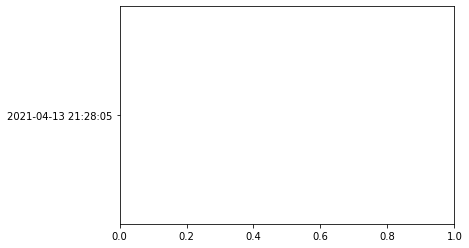

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_testdate,c='r')
plt.show()

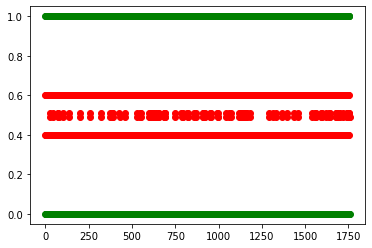

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(range(1758),results,c='r')
plt.scatter(range(1758),Y_test,c='g')
plt.show()